In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt

Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность  Δ  = 3;
дисперсия  𝜎2  = 225;
уровень доверия  𝛽  = 0.95.
Ответ округлите до целого

In [4]:
Z = stats.norm.ppf((1+0.95)/2) #либо воспользумся табличным значением 1.960

var = 225

sigma = var**(1/2) # Стандартное отклонение

e = 3 # Стандартная ошибка среднего

N = ((sigma*Z)/e)**2 

round(N, 0)

96.0

Задание № 1

Постройте 98% доверительный интервал для среднего значения, если известно, что
объем выборки n = 25;
среднее значение по выборке  𝑥⎯⎯⎯  = 130;
Из достоверных источников известно стандартное отклонение  𝜎=15 .
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого

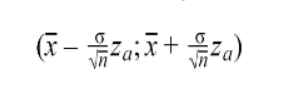

In [5]:
Z = stats.norm.ppf(0.98) #98%
Z

2.0537489106318225

In [6]:
print("Длина доверетильного интервала равна :", round(130 + Z*15/3 - (130 - Z*15/3), 0))

Длина доверетильного интервала равна : 21.0


Задание № 2
Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен  𝛼  = 0.001.
Покажите различия визуально

In [7]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности
#Н0: различия между выборками незначительны 
#Н1: различия между выборками существенны
mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

### Ваш код...
t, p = stats.ttest_ind(mens, womens)
t, p
#так как р уровень значимости достаточно низкий(р < 0.05) и меньше нашего alpha, у нас достаточно оснований, чтобы отбросить 
#нулевую гипотезу. Следовательно различия между выборками существенны.

(3.6635841716708892, 0.00024875321033580573)

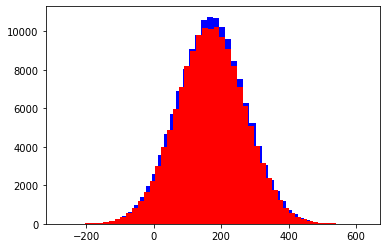

In [8]:
plt.hist(mens, bins=50, color='blue')
plt.hist(womens, bins=50, color='red')
plt.show()

Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

стандартное отклонение  𝜎=150 ;
уровень доверия  𝛽  = 95%;
Погрешность  Δ=50  рублей.

In [9]:
sko = 150
accuracy = 50
z = 1.96
n = ((sko * z) / accuracy) ** 2
print(f'Объем необходимой выборки для исследования среднего чека за кофе в случайном городе: {round(n)}')

Объем необходимой выборки для исследования среднего чека за кофе в случайном городе: 35


Задание № 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( 𝛼=0.05 ).

In [107]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
print('Реальная таблица')
observations

Реальная таблица


,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [100]:
contingency_table = pd.DataFrame(
    [  
[10, 39],
[15, 34]
    ],
    columns = ['Дождь', 'Солнце'],
    index = ['Волшебник', 'Фактически'])
print('Реальная таблица')
print(contingency_table)

Реальная таблица
            Дождь  Солнце
Волшебник      10      39
Фактически     15      34


In [105]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой 
# подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations.values) #Критерий Фишера.

### 0.09523429499183424
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [102]:
oddsratio, pvalue

(0.5811965811965812, 0.35417955365926934)

In [103]:
chi, pval, dof, exp = stats.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

print(pval)
if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
    print('Брехня')
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Похоже на реального предсказателя.""" % (significance))
    

p-value=0.353969, significance=0.05

0.35396880166541644
На 0.05 уровене значимости, мы принимаем нулевые гипотезы.  
            Похоже на мошенника.


Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%  для выборки:

In [12]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

In [13]:
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    print(h)
    return f"Доверительный интервал с точностью {confidence}% между {round(m-h, 2)} и {round(m+h, 2)} со средним равым {round(m, 2)}"

In [14]:
mean_confidence_interval(data, confidence=0.90)


0.55449668246011


'Доверительный интервал с точностью 0.9% между 6.07 и 7.18 со средним равым 6.63'

In [15]:
#Расчет доверительного интервала вручную
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

n = len(data) #---кол-во элементов
m_1 = np.mean(data) #---среднее значение
m_2 = sum(data)/len(data)  #---среднее значение посчитанное вручную они совпадают
se = stats.sem(data)  #---стандартная ошибка среднего
z = 1.645 #---табличное значение для 𝛽=90%


In [16]:
print(round(m_1 - z*se, 2))
print(round(m_1 + z*se, 2))


6.09
7.17


Задание № 6
Принадлежат ли выборки A и B одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

In [17]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

#Ваш код:

In [18]:
t, p_value = stats.ttest_ind(A, B)
t, p_value

(11.865233896372924, 4.623319592204015e-25)

In [19]:
len(A)

112

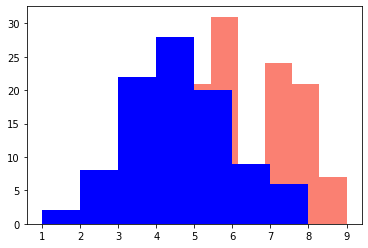

In [20]:
plt.hist(A, bins=7, color='salmon')
plt.hist(B, bins=7, color='blue')
plt.show()

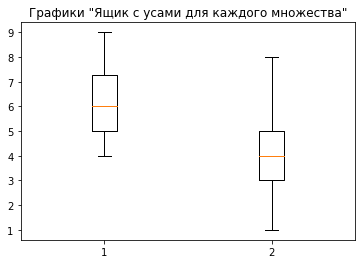

In [42]:
# plt.boxplot(A)
# plt.boxplot(B)
data = [A, B]
fig7, ax7 = plt.subplots()
ax7.set_title('Графики "Ящик с усами для каждого множества"')

ax7.boxplot(data)

plt.show()

In [73]:
# Уровень t достаточно высокий и p достаточно низкий (значительно меньше a = 0.001), соответственно выборки различны
res = stats.ttest_ind(A, B)
print(f"{res[0]}, pvalue={res[1]}")

11.865233896372924, pvalue=4.623319592204015e-25


Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

При p-value = 0.03 мы отвергаем Нулевую Гипотезу, т.к. такой уровень значимости нам говорит о ненормальности распределения. 


Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test  

H0: лекарство не работает и данные получены случайно
Н1: данные получены неслучайно и лекарство влияет на характеристику лечения

In [ ]:
t, p_value = stats.ttest_ind(A, B)
t, p_value

p-value значимости больше 0.05, это значит что у нас недостаточно оснований для отбрасывания Н0


при p-value < 0.05 мы могли бы отбросить Н0 и утверждать, об эффектинвости лекарства 

In [ ]:
plt.hist(A, bins=50, color='salmon')
plt.hist(B, bins=50, color='green')
plt.show()

